In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load the CSV file
df = pd.read_csv('/kaggle/input/electric-production/Electric_Production.csv', parse_dates=['DATE'], dayfirst=True)


In [4]:
# Sort the DataFrame by date
df = df.sort_values(by='DATE')

# Extract the 'Value' column and normalize it
values = df['Value'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# Split the data into training and testing sets
train_size = int(len(scaled_values) * 0.8)
train_data = scaled_values[:train_size]
test_data = scaled_values[train_size:]


In [5]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # You can adjust this value
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [6]:
model = Sequential()
model.add(Bidirectional(GRU(100, activation='relu', input_shape=(sequence_length, 1))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history=model.fit(X_train, y_train, validation_split=0.05, epochs=200, batch_size=32)


Epoch 1/200
10/10 [==============================] - 8s 85ms/step - loss: 0.1067 - val_loss: 0.0852
Epoch 2/200
10/10 [==============================] - 0s 50ms/step - loss: 0.0221 - val_loss: 0.0253
Epoch 3/200
10/10 [==============================] - 0s 50ms/step - loss: 0.0217 - val_loss: 0.0278
Epoch 4/200
10/10 [==============================] - 1s 54ms/step - loss: 0.0156 - val_loss: 0.0338
Epoch 5/200
10/10 [==============================] - 0s 49ms/step - loss: 0.0149 - val_loss: 0.0269
Epoch 6/200
10/10 [==============================] - 1s 50ms/step - loss: 0.0141 - val_loss: 0.0259
Epoch 7/200
10/10 [==============================] - 0s 50ms/step - loss: 0.0133 - val_loss: 0.0265
Epoch 8/200
10/10 [==============================] - 0s 49ms/step - loss: 0.0127 - val_loss: 0.0251
Epoch 9/200
10/10 [==============================] - 0s 49ms/step - loss: 0.0125 - val_loss: 0.0249
Epoch 10/200
10/10 [==============================] - 1s 51ms/step - loss: 0.0126 - val_loss: 0.0246

In [7]:
# Predict on the test data
y_pred = model.predict(X_test)

# Inverse transform to get the actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)


3/3 [==============================] - 0s 10ms/step


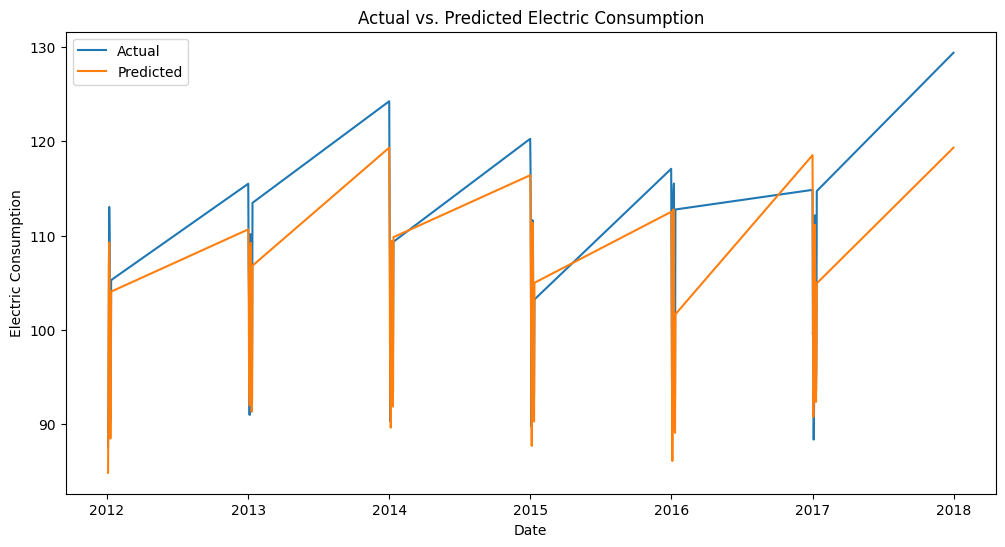

In [8]:
# Create a DataFrame with the dates for the test data
dates = df['DATE'].values[train_size + sequence_length:]

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(dates, y_test, label='Actual')
plt.plot(dates, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Electric Consumption')
plt.title('Actual vs. Predicted Electric Consumption')
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import r2_score

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2:.2f}')


R2 Score: 0.82


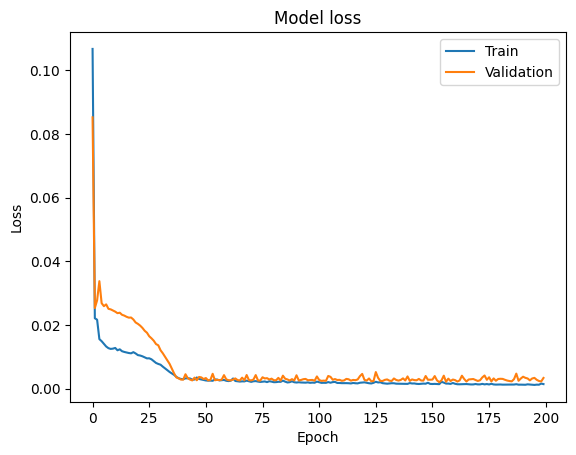

In [10]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and have the 'history' object

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
